In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os

In [5]:
def plot_proportion_over_time(category_names, category_values):
    """
    Plot the proportion of each category over time.

    Args:
        category_names : List of strings of length
        category_values : Numpy array of shape (N, M) where N is the number categories and M is the number of time points.
    """
    X = np.arange(0, category_values.shape[1], 1)
    total = category_values.sum(axis=0)

    cumul = np.zeros_like(total)
    last_line = np.zeros_like(total)
    for i in range(len(category_values)):
        cumul += category_values[i]
        cur_line = cumul / total
        plt.fill_between(X, last_line, cumul / total, alpha=0.5, label=category_names[i])
        last_line = cur_line
    
    plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
    plt.show()

In [6]:
df = pd.read_csv("data/processed/clean_finished_paths.csv")
print(len(df))

28403


In [5]:
categories = pd.read_csv("data/processed/clean_categories.csv")

def fetch_category(category_list, level=1):
    if level == 1:
        return category_list[0]
    elif level == 2:
        return category_list[1] if len(category_list) > 1 else category_list[0]
    elif level == 3:
        return category_list[2] if len(category_list) > 2 else fetch_category(category_list, 2)

categories["category"] = categories["category"].apply(eval)
categories["main"] = categories["category"].apply(fetch_category, level=1)
categories["second"] = categories["category"].apply(fetch_category, level=2)
categories["third"] = categories["category"].apply(fetch_category, level=3)
categories

,article,category,main,second,third
0,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,"[History, British_History, British_History_150...",History,British_History,British_History_1500_and_before_including_Roma...
1,%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,"[People, Historical_figures]",People,Historical_figures,Historical_figures
2,%C3%85land,[Countries],Countries,Countries,Countries
3,%C3%85land,"[Geography, European_Geography, European_Count...",Geography,European_Geography,European_Countries
4,%C3%89douard_Manet,"[People, Artists]",People,Artists,Artists
...,...,...,...,...,...
5199,Zirconium,"[Science, Chemistry, Chemical_elements]",Science,Chemistry,Chemical_elements
5200,Zoroaster,"[People, Religious_figures_and_leaders]",People,Religious_figures_and_leaders,Religious_figures_and_leaders
5201,Zuid-Gelders,"[Geography, European_Geography]",Geography,European_Geography,European_Geography
5202,Zuid-Gelders,"[Language_and_literature, Languages]",Language_and_literature,Languages,Languages


In [6]:
main_categories = categories["main"].unique()
print(len(main_categories))
second_categories = set(categories["second"].unique().tolist()).difference(set(main_categories))
print(len(second_categories))
third_categories = set(categories["third"].unique().tolist()).difference(set(main_categories)).difference(set(second_categories))
print(len(third_categories))

15
99
27


In [8]:
def get_article_category_level_1(article_name):
    """
    Given the name of an article, return its main category (level 1).

    Args:
        article_name (str): The name of the article.

    Returns:
        str: The main category of the article.
    """
    result = categories[categories['article'] == article_name]['main']
    if result.empty:
        return "None"
    return result.values[0]

def get_article_category_level_2(article_name):
    """
    Given the name of an article, return its second category (level 2).

    Args:
        article_name (str): The name of the article.

    Returns:
        str: The second category of the article.
    """
    result = categories[categories['article'] == article_name]['second']
    if result.empty:
        return "None"
    return result.values[0]

def get_article_category_level_3(article_name):
    """
    Given the name of an article, return its third category (level 3).

    Args:
        article_name (str): The name of the article.

    Returns:
        str: The third category of the article.
    """
    result = categories[categories['article'] == article_name]['third']
    if result.empty:
        return "None"
    return result.values[0]

article_name = "Olympic_Games"
print(get_article_category_level_1(article_name))
print(get_article_category_level_2(article_name))
print(get_article_category_level_3(article_name))

Everyday_life
Sports_events
Sports_events


In [9]:
def get_categories_level_1(path_list):
    """
    Given a list of article names, return a list of their main categories (level 1).

    Args:
        path_list (list): List of article names.

    Returns:
        list: List of main categories for the articles.
    """
    return [get_article_category_level_1(article) for article in path_list]

def get_categories_level_2(path_list):
    """
    Given a list of article names, return a list of their second categories (level 2).

    Args:
        path_list (list): List of article names.

    Returns:
        list: List of second categories for the articles.
    """
    return [get_article_category_level_2(article) for article in path_list]

def get_categories_level_3(path_list):
    """
    Given a list of article names, return a list of their third categories (level 3).

    Args:
        path_list (list): List of article names.

    Returns:
        list: List of third categories for the articles.
    """
    return [get_article_category_level_3(article) for article in path_list]


#if "finished_paths_with_categories.csv" in os.listdir():
#    df = pd.read_csv("finished_paths_with_categories.csv")
#else:
#    print("Computing level 1 ...")
#    df['path_categories_1'] = df['path'].apply(eval).apply(get_categories, level=1)
#    print("Computing level 2 ...")
#    df['path_categories_2'] = df['path'].apply(eval).apply(get_categories, level=2)
#    print("Computing level 3 ...")
#    df['path_categories_3'] = df['path'].apply(eval).apply(get_categories, level=3)
#    df.to_csv("finished_paths_with_categories.csv", index=False)

df = pd.read_csv("finished_paths_with_categories.csv")
print("Computing level 2 ...")
df['path_categories_2'] = df['path'].apply(eval).apply(get_categories_level_2)
df.to_csv("finished_paths_with_categories.csv", index=False)
print("Computing level 3 ...")
df['path_categories_3'] = df['path'].apply(eval).apply(get_categories_level_3)
df.to_csv("finished_paths_with_categories.csv", index=False)

df

Computing level 2 ...
Computing level 3 ...


,hashedIpAddress,timestamp,durationInSec,path,rating,nb_clicks,nb_back_clicks,path_length,source,target,source_category,target_category,path_categories_1,path_categories_2,path_categories_3
0,6a3701d319fc3754,2011-02-15 03:26:49,166,"['14th_century', '15th_century', '16th_century...",-1,8,0,8,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']","['History', 'History', 'History', 'Geography',...","[General_history, General_history, General_his...","[General_history, General_history, General_his..."
1,3824310e536af032,2012-08-12 06:36:52,88,"['14th_century', 'Europe', 'Africa', 'Atlantic...",3,4,0,4,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']","['History', 'Geography', 'Geography', 'History...","[General_history, European_Geography, African_...","[General_history, European_Geography, African_..."
2,415612e93584d30e,2012-10-03 21:10:40,138,"['14th_century', 'Niger', 'Nigeria', 'British_...",-1,7,0,7,14th_century,African_slave_trade,"['History', 'General_history']","['History', 'General_history']","['History', 'Geography', 'Geography', 'History...","[General_history, African_Geography, African_G...","[General_history, African_Countries, African_C..."
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,"['14th_century', 'Renaissance', 'Ancient_Greec...",-1,3,0,3,14th_century,Greece,"['History', 'General_history']",['Countries'],"['History', 'History', 'History', 'Countries']","[General_history, General_history, Ancient_His...","[General_history, General_history, Ancient_His..."
4,64dd5cd342e3780c,2010-02-08 07:25:25,37,"['14th_century', 'Renaissance', 'Ancient_Greec...",-1,3,0,3,14th_century,Greece,"['History', 'General_history']","['Geography', 'European_Geography', 'European_...","['History', 'History', 'History', 'Countries']","[General_history, General_history, Ancient_His...","[General_history, General_history, Ancient_His..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70855,15a13a1d66ef5456,2012-10-03 02:23:35,66,"['Yagan', 'Ancient_Egypt', 'Civilization']",-1,2,0,2,Yagan,Civilization,"['People', 'Historical_figures']","['Citizenship', 'Culture_and_Diversity']","['People', 'History', 'Citizenship']","[Historical_figures, Ancient_History_Classical...","[Historical_figures, Ancient_History_Classical..."
70856,2ef7ac844cefda58,2011-03-16 05:42:18,165,"['Yagan', 'Folklore', 'Brothers_Grimm', '<', '...",3,8,1,7,Yagan,Fiction,"['People', 'Historical_figures']","['Language_and_literature', 'Literature_types']","['People', 'History', 'People', None, 'History...","[Historical_figures, Ancient_History_Classical...","[Historical_figures, Ancient_History_Classical..."
70857,12863abb7887f890,2013-11-22 04:42:52,228,"['Yagan', 'Australia', 'England', 'France', 'U...",-1,6,0,6,Yagan,U.S._Open_%28tennis%29,"['People', 'Historical_figures']","['Everyday_life', 'Sports_events']","['People', 'Countries', 'Geography', 'Countrie...","[Historical_figures, Countries, Geography_of_G...","[Historical_figures, Countries, Geography_of_G..."
70858,19f8284371753362,2011-02-27 07:42:47,56,"['Yarralumla%2C_Australian_Capital_Territory',...",1,3,0,3,Yarralumla%2C_Australian_Capital_Territory,Abraham_Lincoln,"['Geography', 'Geography_of_Oceania_Australasia']","['People', 'USA_Presidents']","['Geography', 'Countries', 'Countries', 'People']","[Geography_of_Oceania_Australasia, Countries, ...","[Geography_of_Oceania_Australasia, Countries, ..."


In [11]:
all_categories = main_categories.tolist() + list(second_categories) + list(third_categories)

print("Computing for main categories ...")
for category in main_categories:
    df[category] = df['path_categories_1'].apply(lambda x: x.count(category))

print("Computing for second categories ...")
for category in second_categories:
    
    df[category] = df['path_categories_2'].apply(lambda x: x.count(category))

print("Computing for third categories ...")
for category in third_categories:
    df[category] = df['path_categories_3'].apply(lambda x: x.count(category))

Computing for main categories ...
Computing for second categories ...


C:\Users\lysan\AppData\Local\Temp\ipykernel_3524\2182737299.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[category] = df['path_categories_2'].apply(lambda x: x.count(category))
C:\Users\lysan\AppData\Local\Temp\ipykernel_3524\2182737299.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[category] = df['path_categories_2'].apply(lambda x: x.count(category))
C:\Users\lysan\AppData\Local\Temp\ipykernel_3524\2182737299.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

Computing for third categories ...


C:\Users\lysan\AppData\Local\Temp\ipykernel_3524\2182737299.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[category] = df['path_categories_3'].apply(lambda x: x.count(category))
C:\Users\lysan\AppData\Local\Temp\ipykernel_3524\2182737299.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[category] = df['path_categories_3'].apply(lambda x: x.count(category))
C:\Users\lysan\AppData\Local\Temp\ipykernel_3524\2182737299.py:14: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `f

In [12]:
df

,hashedIpAddress,timestamp,durationInSec,path,rating,nb_clicks,nb_back_clicks,path_length,source,target,...,British_History_Post_1900,British_History_15001750,Electricity_and_Electronics,Chemical_elements,Middle_Eastern_Countries,Dinosaurs,Organisms,European_Countries,African_Countries,Central_and_South_American_Countries
0,6a3701d319fc3754,2011-02-15 03:26:49,166,"['14th_century', '15th_century', '16th_century...",-1,8,0,8,14th_century,African_slave_trade,...,0,0,0,0,0,0,0,0,0,0
1,3824310e536af032,2012-08-12 06:36:52,88,"['14th_century', 'Europe', 'Africa', 'Atlantic...",3,4,0,4,14th_century,African_slave_trade,...,0,0,0,0,0,0,0,0,0,0
2,415612e93584d30e,2012-10-03 21:10:40,138,"['14th_century', 'Niger', 'Nigeria', 'British_...",-1,7,0,7,14th_century,African_slave_trade,...,0,0,0,0,0,0,0,0,2,0
3,64dd5cd342e3780c,2010-02-08 07:25:25,37,"['14th_century', 'Renaissance', 'Ancient_Greec...",-1,3,0,3,14th_century,Greece,...,0,0,0,0,0,0,0,0,0,0
4,64dd5cd342e3780c,2010-02-08 07:25:25,37,"['14th_century', 'Renaissance', 'Ancient_Greec...",-1,3,0,3,14th_century,Greece,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70855,15a13a1d66ef5456,2012-10-03 02:23:35,66,"['Yagan', 'Ancient_Egypt', 'Civilization']",-1,2,0,2,Yagan,Civilization,...,0,0,0,0,0,0,0,0,0,0
70856,2ef7ac844cefda58,2011-03-16 05:42:18,165,"['Yagan', 'Folklore', 'Brothers_Grimm', '<', '...",3,8,1,7,Yagan,Fiction,...,0,0,0,0,0,0,0,0,0,0
70857,12863abb7887f890,2013-11-22 04:42:52,228,"['Yagan', 'Australia', 'England', 'France', 'U...",-1,6,0,6,Yagan,U.S._Open_%28tennis%29,...,0,0,0,0,0,0,0,0,0,0
70858,19f8284371753362,2011-02-27 07:42:47,56,"['Yarralumla%2C_Australian_Capital_Territory',...",1,3,0,3,Yarralumla%2C_Australian_Capital_Territory,Abraham_Lincoln,...,0,0,0,0,0,0,0,0,0,0


In [13]:
df["year_month"] = df["timestamp"].str[:7]

category_freq = df.groupby(by="year_month")[main_categories.tolist()].mean()
category_freq["total"] = category_freq.sum(axis=1)

category_freq = category_freq.div(category_freq["total"], axis=0)

category_freq

C:\Users\lysan\AppData\Local\Temp\ipykernel_3524\1299240264.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["year_month"] = df["timestamp"].str[:7]


,History,People,Countries,Geography,Business_Studies,Science,Everyday_life,Design_and_Technology,Music,IT,Language_and_literature,Mathematics,Religion,Art,Citizenship,total
year_month,,,,,,,,,,,,,,,,
2008-08,0.080846,0.084577,0.082090,0.216418,0.013682,0.236318,0.080846,0.024876,0.011194,0.032338,0.022388,0.013682,0.055970,0.004975,0.039801,1.0
2008-09,0.072925,0.055469,0.100465,0.309542,0.010085,0.215283,0.084950,0.019007,0.009697,0.008146,0.030256,0.008146,0.016680,0.010861,0.048487,1.0
2008-10,0.066834,0.049757,0.094656,0.296482,0.009127,0.233181,0.105403,0.013985,0.006477,0.009421,0.027823,0.008538,0.021198,0.008833,0.048285,1.0
2008-11,0.070633,0.045745,0.099550,0.295568,0.014458,0.247215,0.076795,0.010903,0.007585,0.007822,0.034131,0.010192,0.022280,0.007348,0.049775,1.0
2008-12,0.098524,0.055934,0.094832,0.285349,0.012777,0.195911,0.091425,0.022714,0.009654,0.008234,0.031516,0.015332,0.022430,0.007382,0.047984,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-09,0.112778,0.040370,0.102037,0.231852,0.013519,0.231296,0.074259,0.036111,0.013704,0.023148,0.040185,0.009259,0.023333,0.004444,0.043704,1.0
2013-10,0.117406,0.045034,0.102879,0.221606,0.013735,0.228737,0.083862,0.040412,0.008980,0.019810,0.036978,0.011094,0.020470,0.003302,0.045695,1.0
2013-11,0.089390,0.051744,0.108430,0.221221,0.015698,0.214971,0.088227,0.038372,0.012209,0.021512,0.042297,0.010174,0.030814,0.007413,0.047529,1.0


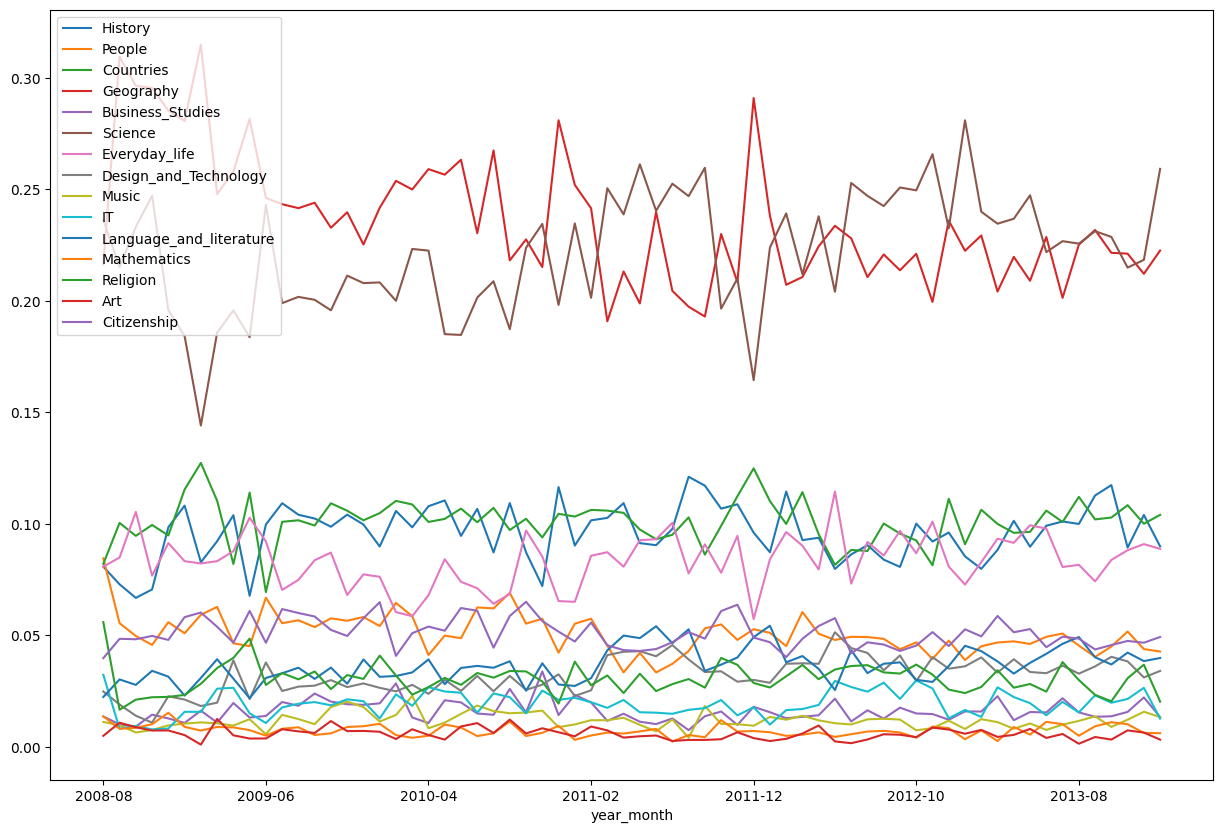

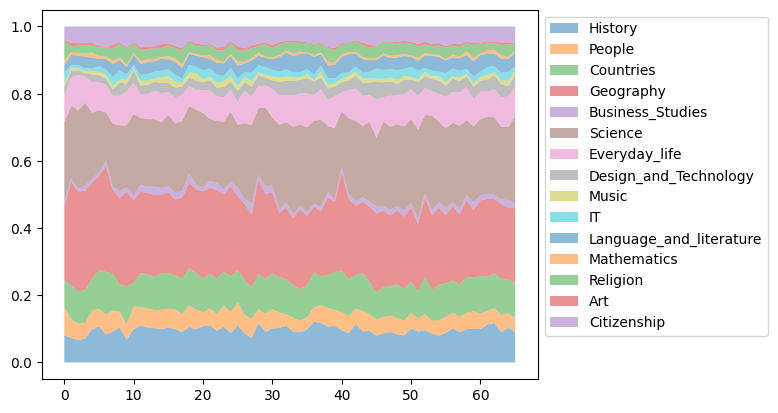

In [ ]:
def plot_categories_over_time(main_categories, category_freq):
    category_freq.plot(kind="line", y=main_categories, figsize=(15, 10))
    plt.show()
    plot_proportion_over_time(main_categories, category_freq[main_categories].values.T)
    plt.show()

plot_categories_over_time(main_categories.tolist(), category_freq)

In [58]:
categories_to_drop = ["Geography", "Science"]
new_categories = [category for category in main_categories if category not in categories_to_drop]

category_freq_filtered = category_freq.drop(columns=categories_to_drop)
category_freq_filtered["total"] = category_freq_filtered.sum(axis=1)
category_freq_filtered = category_freq_filtered.div(category_freq_filtered["total"], axis=0)

category_freq_filtered

,History,People,Countries,Business_Studies,Everyday_life,Design_and_Technology,Music,IT,Language_and_literature,Mathematics,Religion,Art,Citizenship,total
year_month,,,,,,,,,,,,,,
2008-08,0.031738,0.033203,0.032227,0.005371,0.031738,0.009766,0.004395,0.012695,0.008789,0.005371,0.021973,0.001953,0.015625,1.0
2008-09,0.029462,0.022410,0.040589,0.004075,0.034321,0.007679,0.003918,0.003291,0.012224,0.003291,0.006739,0.004388,0.019589,1.0
2008-10,0.027054,0.020142,0.038317,0.003695,0.042667,0.005661,0.002622,0.003814,0.011263,0.003456,0.008581,0.003575,0.019546,1.0
2008-11,0.028745,0.018617,0.040513,0.005884,0.031253,0.004437,0.003087,0.003183,0.013890,0.004148,0.009067,0.002990,0.020257,1.0
2008-12,0.039116,0.022207,0.037651,0.005073,0.036298,0.009018,0.003833,0.003269,0.012513,0.006087,0.008905,0.002931,0.019051,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-09,0.044456,0.015914,0.040222,0.005329,0.029272,0.014235,0.005402,0.009125,0.015841,0.003650,0.009198,0.001752,0.017228,1.0
2013-10,0.046048,0.017663,0.040350,0.005387,0.032891,0.015850,0.003522,0.007770,0.014503,0.004351,0.008029,0.001295,0.017922,1.0
2013-11,0.034866,0.020183,0.042293,0.006123,0.034412,0.014967,0.004762,0.008390,0.016498,0.003968,0.012019,0.002891,0.018538,1.0


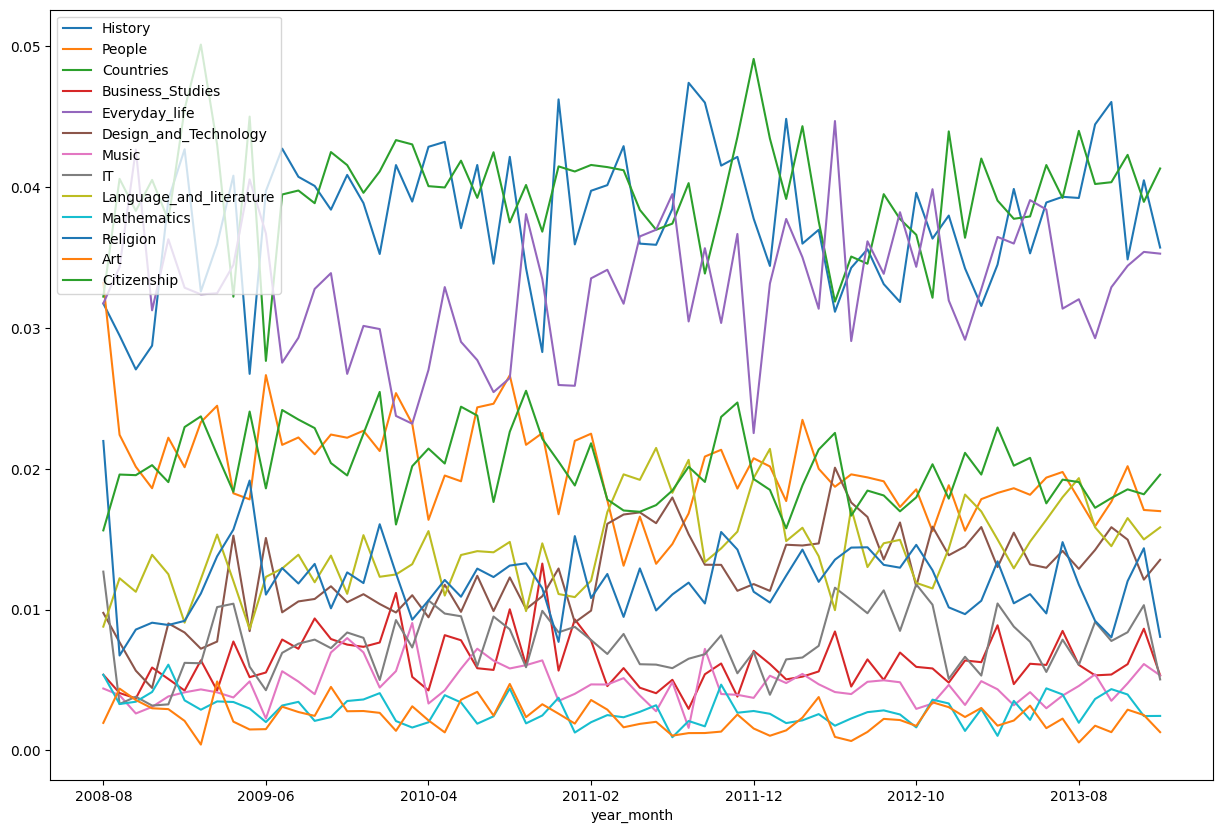

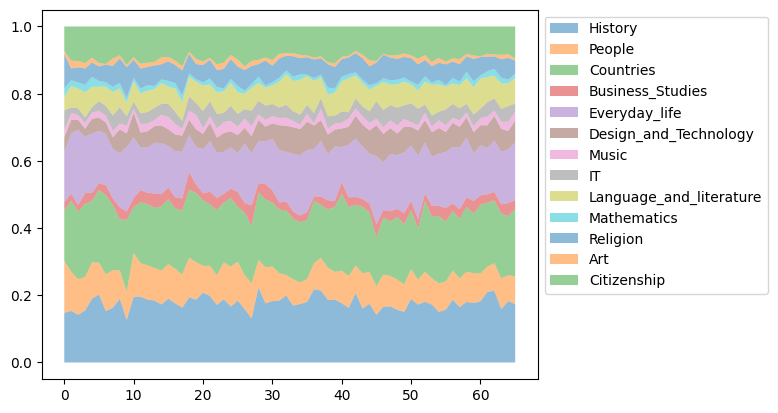

In [59]:
plot_categories_over_time(new_categories, category_freq_filtered)

### Individual Category Study

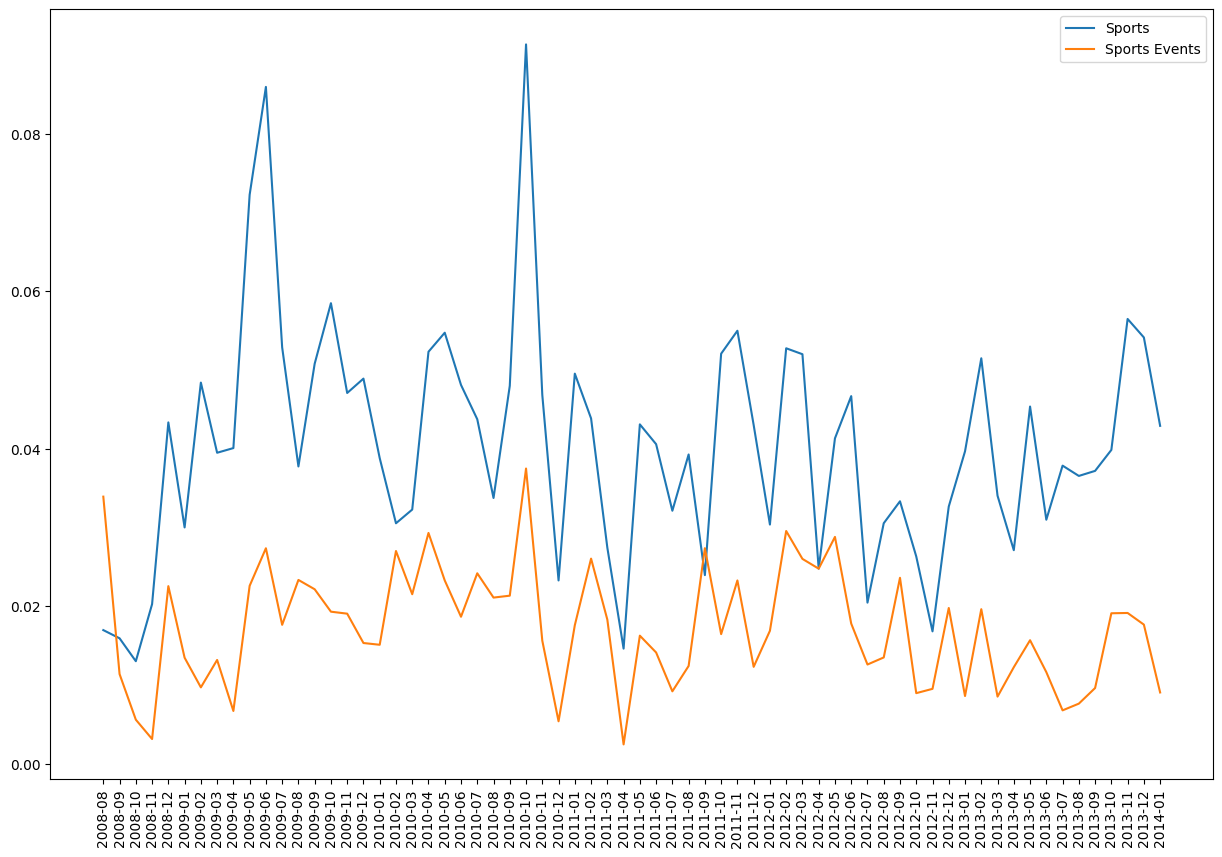

In [ ]:
# CALCULER LES FREQUANCE D'APPARITION DES CATEGORIES PAS LE NOMBRE
#
#
#


sport_category_data = df.groupby(by="year_month")["Sports"].mean()
sport_events_category_data = df.groupby(by="year_month")["Sports_events"].mean()


plt.figure(figsize=(15, 10))
plt.plot(sport_category_data.index, sport_category_data.values, label="Sports")
plt.plot(sport_category_data.index, sport_events_category_data.values, label="Sports Events")
plt.xticks(sport_category_data.index, rotation=90)
plt.legend()
plt.show()

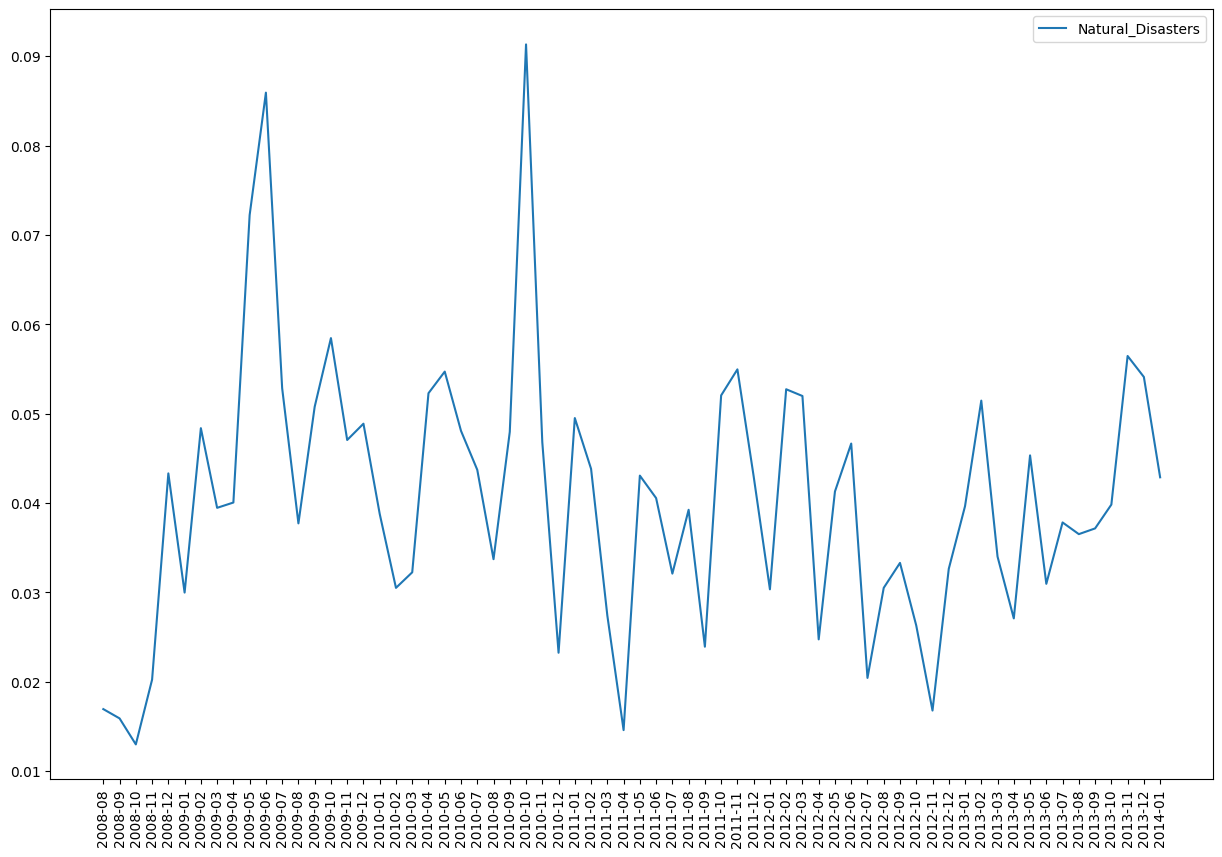

In [21]:
natural_disaster_category_data = df.groupby(by="year_month")["Natural_Disasters"].mean()

plt.figure(figsize=(15, 10))
plt.plot(sport_category_data.index, sport_category_data.values, label="Natural_Disasters")
plt.xticks(sport_category_data.index, rotation=90)
plt.legend()
plt.show()